#### Basic Python imports and config

In [1]:
import pandas as pd # import pandas for easy data manipulation using data frames

from matplotlib import pyplot as plt # plotting
import seaborn as sns                # slightly better plotting 

# to upload local files
import io
from google.colab import files  

# for basic modeling
import statsmodels.api as sm
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn import tree                                  # sklearn tree model for decision trees
from sklearn.model_selection import train_test_split      # for partitioning data
from sklearn.model_selection import cross_val_score       # for cross validation
from sklearn.metrics import roc_auc_score, accuracy_score # to assess decision tree perforamce

# sklearn for single DT
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# ALWAYS set a random seed when working with randomness
SEED = 12345


!pip install shap 

import shap # Python Shapley value package

# system packages for calling external graphviz processes
import os
import re
import subprocess

import operator # for sorting dictionaries

# in-notebook display
from IPython.display import Image
from IPython.display import display
%matplotlib inline

# install Java for h2o backend
!apt-get install default-jre
!java -version

# install h2o
!pip install h2o 

# import h2o and required classes
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator # for LIME
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

h2o.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 25.7 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.2 MB 54 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.1-py2.py3-none-any.whl size=177276478 

H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_eezy29
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Import data and display

In [6]:
# special google collab command to upload a file from computer
uploaded = files.upload()
data = pd.read_csv(io.StringIO(uploaded['Main.csv'].decode('utf-8'))) # name in quotes here must match name in quotes directly above 
data = data.drop(columns=['Unnamed: 0'])
data.head()
# PH: consider not changing to numbers for more interpretable results

Saving Main.csv to Main (1).csv


,Company ID,‘Bias-Free'/No bias,Video Screening,Resume/Profile Screening,Chatbots,Addresses Physical Disabilities,Addresses Neurodiversity,Public Accessability Staff,Offers Accommodations,Immediate/Timeframe for Accommodations,Reports Bias Testing,Number of Total Staff
0,1,0,0,1,1,0,1,1,1,0,2,Large
1,2,0,1,0,1,0,1,0,1,0,1,Medium
2,3,2,2,0,0,0,1,0,1,2,1,Medium
3,4,0,0,1,0,1,1,0,0,0,0,Medium
4,5,1,0,1,0,0,0,0,0,0,1,Medium


In [7]:
data = data.replace({0: "No", 1 : "Yes", 2: 'Maybe'})

#### Sanity check summarization of categorical data

In [8]:
data = data.astype('category')
data_ols = pd.get_dummies(data.loc[:, ~data.columns.isin(['Company ID'])], drop_first=True)
data_ols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   ‘Bias-Free'/No bias_No                      30 non-null     uint8
 1   ‘Bias-Free'/No bias_Yes                     30 non-null     uint8
 2   Video Screening_No                          30 non-null     uint8
 3   Video Screening_Yes                         30 non-null     uint8
 4   Resume/Profile Screening_Yes                30 non-null     uint8
 5   Chatbots_No                                 30 non-null     uint8
 6   Chatbots_Yes                                30 non-null     uint8
 7   Addresses Physical Disabilities_Yes         30 non-null     uint8
 8   Addresses Neurodiversity_Yes                30 non-null     uint8
 9   Public Accessability Staff_Yes              30 non-null     uint8
 10  Offers Accommodations_No                

#### Correlation plot

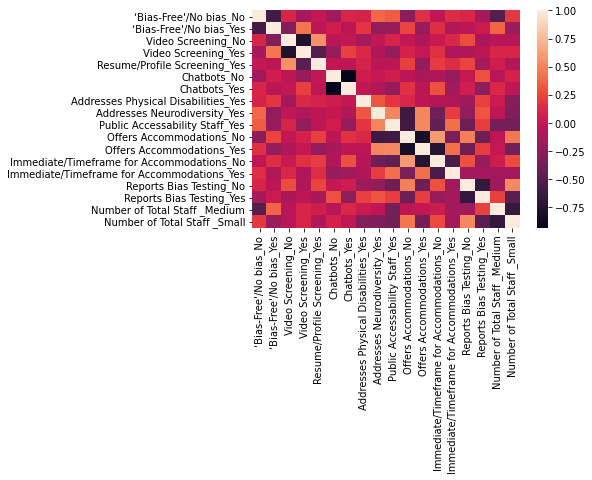

In [9]:
corr = data_ols.corr()
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)


#### Basic summary of collected data

In [10]:
plt.rcParams.update({'font.size': 25})

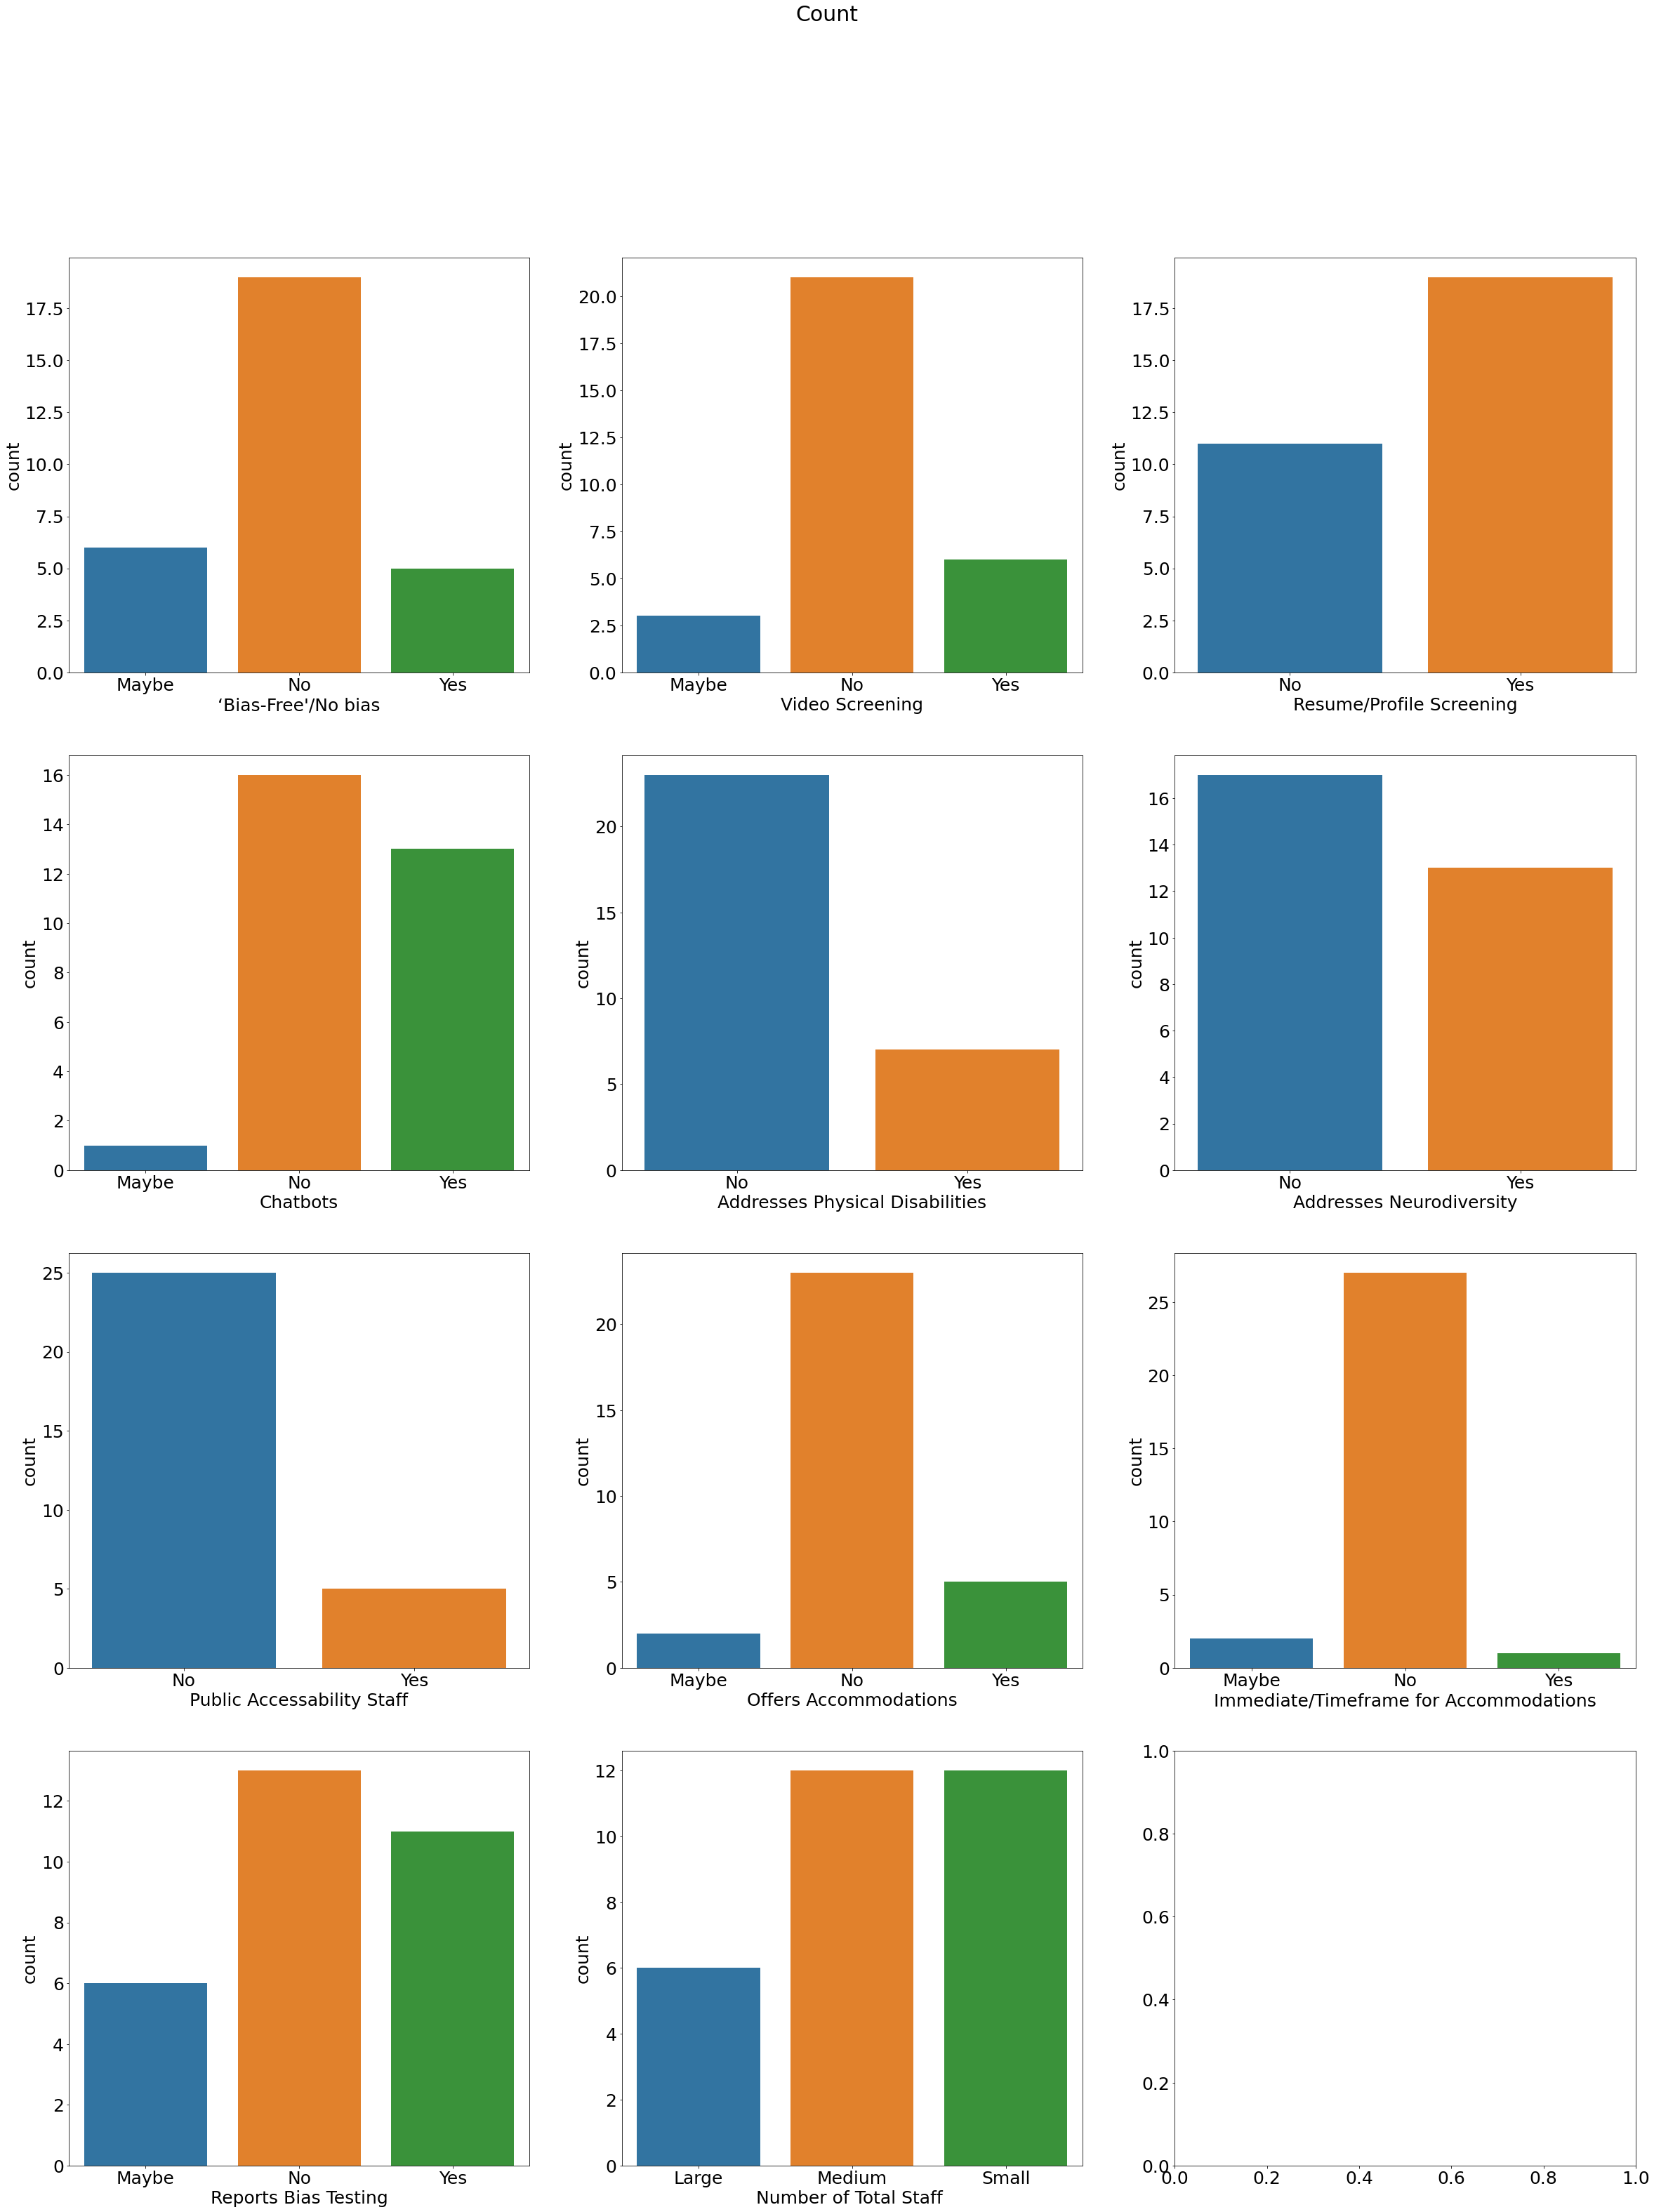

In [11]:
# Display count for all features except for company name
fig, axes = plt.subplots(4, 3, figsize=(40, 50))
fig.suptitle('Count')


sns.countplot(data=data,x="‘Bias-Free'/No bias", ax=axes[0,0]) 
sns.countplot(data=data,x="Video Screening", ax=axes[0,1]) 

sns.countplot(data=data,x="Resume/Profile Screening", ax=axes[0,2])
sns.countplot(data=data,x="Chatbots", ax=axes[1,0])
sns.countplot(data=data,x="Addresses Physical Disabilities", ax=axes[1,1])
sns.countplot(data=data,x="Addresses Neurodiversity", ax=axes[1,2])
sns.countplot(data=data,x="Public Accessability Staff", ax=axes[2,0])
sns.countplot(data=data,x="Offers Accommodations", ax=axes[2,1])
sns.countplot(data=data,x="Immediate/Timeframe for Accommodations", ax=axes[2,2])
sns.countplot(data=data,x="Reports Bias Testing", ax=axes[3,0])
sns.countplot(data=data,x="Number of Total Staff ", ax=axes[3,1])
fig.show()

# PH: Really good for a summary snapshot of what these tools are like

## Key Questions

1.   How do smaller companies compare to the whole sample?

2.   Do companies that don't offer accommodations perform poorly across other categories/features?

3.   Does a disparity exist between companies mentioning neurodivergency on their website versus physical disabilities? / Does a company addressing neurodiversity make them more likely to offer disability accommodations versus when a company addresses physical disability?

4.   If a company reports bias testing is it more likely that they offer accommodations?

5. What percentage of companies offer AI/ML video screening, without any accommodations?

6. What percentage of companies that offer accommodations also offer them immediately or provide a timeframe? (leading to screen out)



#### Same summary as a table

In [12]:
stats = pd.DataFrame()

list_b =["‘Bias-Free'/No bias","Video Screening","Chatbots","Resume/Profile Screening", "Addresses Physical Disabilities","Addresses Neurodiversity","Public Accessability Staff","Offers Accommodations","Reports Bias Testing"]

for b in list_b:
    stats[b] = data[b].value_counts(normalize=True).round(4)*100

stats

,‘Bias-Free'/No bias,Video Screening,Chatbots,Resume/Profile Screening,Addresses Physical Disabilities,Addresses Neurodiversity,Public Accessability Staff,Offers Accommodations,Reports Bias Testing
No,63.33,70.0,53.33,36.67,76.67,56.67,83.33,76.67,43.33
Maybe,20.00,10.0,3.33,NaN,NaN,NaN,NaN,6.67,20.00
Yes,16.67,20.0,43.33,63.33,23.33,43.33,16.67,16.67,36.67


How do smaller companies compare to the whole sample?

In [13]:
sml = data[data["Number of Total Staff "]== 'Small']
stats_sml = pd.DataFrame()

for b in list_b:
    stats_sml[b] = sml[b].value_counts(normalize=True).round(4)*100

stats_sml

,‘Bias-Free'/No bias,Video Screening,Chatbots,Resume/Profile Screening,Addresses Physical Disabilities,Addresses Neurodiversity,Public Accessability Staff,Offers Accommodations,Reports Bias Testing
No,75.00,66.67,58.33,41.67,91.67,75.0,100.0,100.0,75.00
Maybe,16.67,8.33,0.00,NaN,NaN,NaN,NaN,0.0,16.67
Yes,8.33,25.00,41.67,58.33,8.33,25.0,0.0,0.0,8.33


In [14]:
s = stats_sml - stats
s

,‘Bias-Free'/No bias,Video Screening,Chatbots,Resume/Profile Screening,Addresses Physical Disabilities,Addresses Neurodiversity,Public Accessability Staff,Offers Accommodations,Reports Bias Testing
No,11.67,-3.33,5.00,5.0,15.0,18.33,16.67,23.33,31.67
Maybe,-3.33,-1.67,-3.33,NaN,NaN,NaN,NaN,-6.67,-3.33
Yes,-8.34,5.00,-1.66,-5.0,-15.0,-18.33,-16.67,-16.67,-28.34


#### Company sizes

In [15]:
size = data['Number of Total Staff '].value_counts(normalize=True).round(4)*100
size

Medium    40.0
Small     40.0
Large     20.0
Name: Number of Total Staff , dtype: float64

Do companies that don't offer accommodations perform poorly across other categories/features?

In [17]:
#Q2
gb = data.groupby(["‘Bias-Free'/No bias","Video Screening","Chatbots","Addresses Physical Disabilities"])['Company ID'].count()

gb.to_frame()


Company ID
‘Bias-Free'/No bias Video Screening Chatbots Addresses Physical Disabilities            
Maybe               Maybe           Maybe    No                                        0
                                             Yes                                       0
                                    No       No                                        1
                                             Yes                                       0
                                    Yes      No                                        0
                                             Yes                                       0
                    No              Maybe    No                                        0
                                             Yes                                       0
                                    No       No                                        3
                                             Yes                                       0
                                    Yes      No                                        2
                                             Yes                                       0
                    Yes             Maybe    No                                        0
                                             Yes                                       0
                                    No       No                                        0
                                             Yes                                       0
                                    Yes      No                                        0
                                             Yes                                       0
No                  Maybe           Maybe    No                                        0
                                             Yes                                       0
                                    No       No                                        1
                                             Yes                                       1
                                    Yes      No                                        0
                                             Yes                                       0
                    No              Maybe    No                                        1
                                             Yes                                       0
                                    No       No                                        3
                                             Yes                                       3
                                    Yes      No                                        6
                                             Yes                                       1
                    Yes             Maybe    No                                        0
                                             Yes                                       0
                                    No       No                                        1
                                             Yes                                       0
                                    Yes      No                                        2
                                             Yes                                       0
Yes                 Maybe           Maybe    No                                        0
                                             Yes                                       0
                                    No       No                                        0
                                             Yes                                       0
                                    Yes      No                                        0
                                             Yes                                       0
                    No              Maybe    No                                        0
                                             Yes                         

Does a disparity exist between companies mentioning neurodivergency on their website versus physical disabilities? / Does a company addressing neurodiversity make them more likely to offer disability accommodations versus when a company addresses physical disability?

In [19]:
#3
dis = data.groupby(["Addresses Physical Disabilities","Addresses Neurodiversity","Offers Accommodations"])['Company ID'].count()

dis.to_frame()

Company ID
Addresses Physical Disabilities Addresses Neurodiversity Offers Accommodations            
No                              No                       Maybe                           0
                                                         No                             15
                                                         Yes                             0
                                Yes                      Maybe                           2
                                                         No                              2
                                                         Yes                             4
Yes                             No                       Maybe                           0
                                                         No                              2
                                                         Yes                             0
                                Yes                      Maybe                           0
                                                         No                              4
                                                         Yes                             1

If a company reports bias testing is it more likely that they offer accommodations?

In [20]:
#Q4

vid = data[data["Reports Bias Testing"]== 'Yes']
vid=vid["Offers Accommodations"].value_counts(normalize=True).round(4)*100
vid.to_frame()

,Offers Accommodations
No,54.55
Yes,27.27
Maybe,18.18


What percentage of companies offer AI/ML video screening, without any accommodations?

In [21]:
#Q5

vid = data[data["Video Screening"]== 'Yes']
vid=vid["Offers Accommodations"].value_counts(normalize=True).round(4)*100
vid.to_frame()

,Offers Accommodations
No,83.33
Yes,16.67
Maybe,0.00


What percentage of companies that offer accommodations also offer them immediately or provide a timeframe? (leading to screen out)

In [22]:
#Q6

imm = data[data["Offers Accommodations"]== 'Yes']
imm =imm["Immediate/Timeframe for Accommodations"].value_counts(normalize=True).round(4)*100
imm.to_frame()

,Immediate/Timeframe for Accommodations
Maybe,40.0
No,40.0
Yes,20.0


## Modeling attempts

## Decision Tree 

In [33]:
y_name  = 'Offers Accommodations_Yes'
x_names = ["‘Bias-Free'/No bias_Yes", 'Video Screening_Yes', 'Resume/Profile Screening_Yes', 'Chatbots_Yes',  'Addresses Physical Disabilities_Yes',
           'Addresses Neurodiversity_Yes', 'Public Accessability Staff_Yes',
           'Number of Total Staff _Small', "Number of Total Staff _Medium"]

train_X, train_y = data_ols[x_names], data_ols[y_name]

# summarize 
print('Training data_ols: %i rows and %i columns' % (train_X.shape[0], train_X.shape[1] + 1))

Training data_ols: 30 rows and 10 columns


Train decision tree model to predict if company offers accommodations with validation data

In [24]:
# train decision tree 
# with validation-based early stopping
max_depth = 12
candidate_models = {}

for depth in range(0, max_depth):

  # fit tree at a certain depth
  clf = tree.DecisionTreeClassifier(max_depth = depth + 1, random_state=SEED)
  clf.fit(train_X, train_y)

  # calculate AUC
  train_phat = clf.predict_proba(train_X)[:, 1] # score current tree on trainig data
  train_auc = roc_auc_score(train_y, train_phat) # train AUC

  # calculate cross-validation metrics
  # to assess stability
  cv_scores = cross_val_score(clf, train_X, train_y, scoring='roc_auc', cv=3)
  cv_std = np.std(cv_scores)

  # store information about current tree
  candidate_models[depth + 1] = {}
  candidate_models[depth + 1]['Model'] = clf
  candidate_models[depth + 1]['Training AUC'] = train_auc
  candidate_models[depth + 1]['5-Fold SD'] = cv_std


Generate iteration plot based on AUC

    Training AUC  5-Fold SD
1          0.760   0.131068
2          0.904   0.170489
3          0.960   0.167316
4          1.000   0.183995
5          1.000   0.183995
6          1.000   0.183995
7          1.000   0.183995
8          1.000   0.183995
9          1.000   0.183995
10         1.000   0.183995
11         1.000   0.183995
12         1.000   0.183995


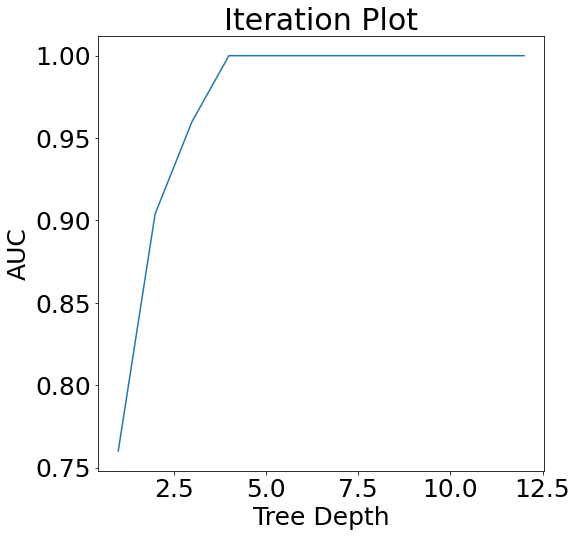

In [25]:
# plot tree depth vs. training and validation AUC
# using simple pandas plotting and matplotlib
candidate_results = pd.DataFrame.from_dict(candidate_models, orient='index')
fig, ax = plt.subplots(figsize=(8, 8))
_ = candidate_results['Training AUC'].plot(title='Iteration Plot', ax=ax)
_ = ax.set_xlabel('Tree Depth')
_ = ax.set_ylabel('AUC')

print(candidate_results.iloc[:, 1:])

Select the best model based on the iteration plot

In [27]:
# Think about decision between depth 3 and 4
# 4 is probably too complex, but describes the data perfectly
# 3 is probably the best 
best_model = candidate_models[3]['Model']
sklearn.tree.export_graphviz(best_model, 'best_model.gv', feature_names=x_names, proportion=True)

Visualize entire tree

In [28]:
# construct call to generate PNG from 
# graphviz representation of the tree
png_args = str('dot -Tpng best_model.gv -o best_model.png')
png_args = png_args.split()

# call
print('Calling external process ...')
print(' '.join(png_args))
_ = subprocess.call(png_args)

Calling external process ...
dot -Tpng best_model.gv -o best_model.png


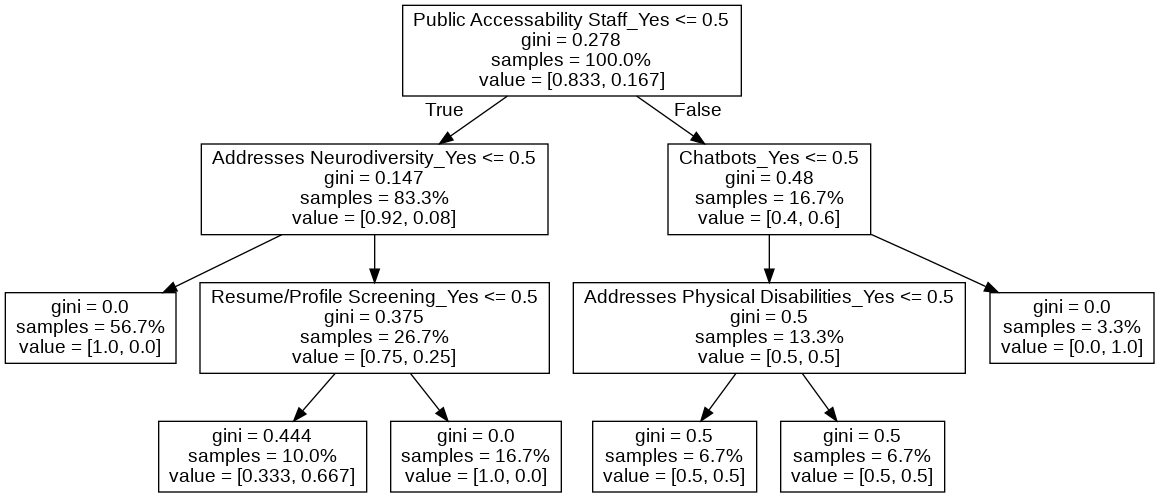

In [29]:
# display in-notebook
# PH: Make sure this makes sense
display(Image(('best_model.png')))

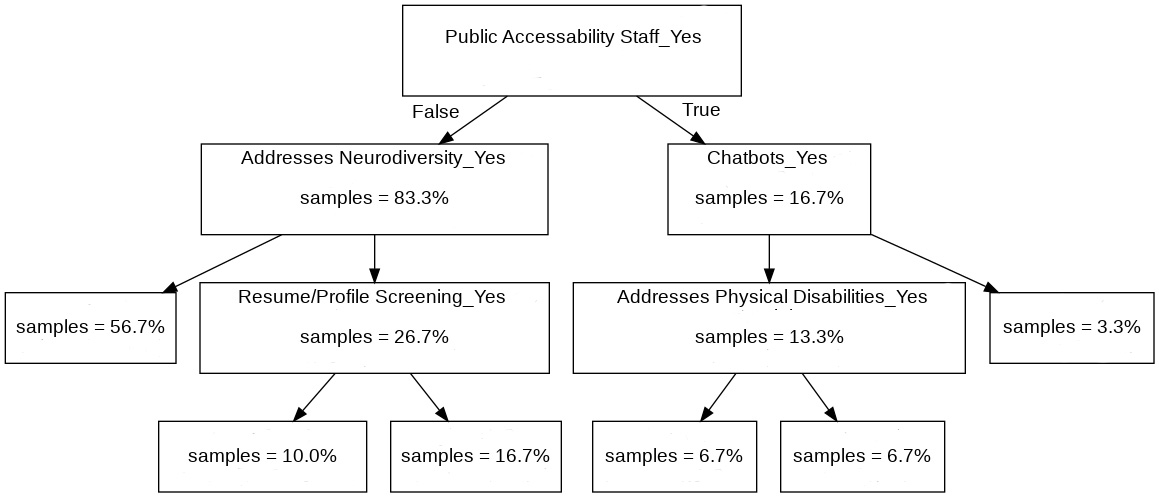

Plot feature importance

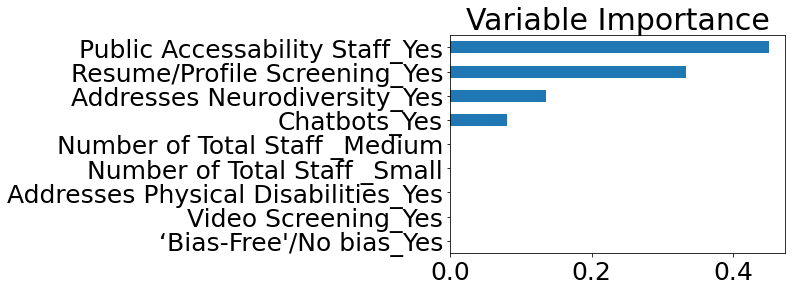

In [30]:
# plot variable importances
# create pandas dataframe
# plot dataframe values
importances = pd.DataFrame(best_model.feature_importances_,
                           index=x_names,
                           columns=['Importance'])
_ = importances.sort_values(by='Importance').plot(kind='barh', title='Variable Importance', legend=False)

#### Penalized logistic regression

##### Utility function for grid search

In [31]:

def glm_grid(x_names, y_name, htrain, hvalid=None, seed_=12345):

    """ Wrapper function for penalized GLM with alpha and lambda search.
    :param x_names: List of inputs.
    :param y_name: Name of target variable.
    :param htrain: Training H2OFrame.
    :param hvalid: Validation H2OFrame, default None.
    :param seed_: Random seed for better reproducibility, default 12345.
    :return: Best H2OGeneralizedLinearEstimator.
    """

    alpha_opts = [0.01, 0.25, 0.5, 0.75, 0.99]  # always keep some L2

    # define search criteria
    # i.e., over alpha
    # lamda search handled by lambda_search param below
    hyper_parameters = {'alpha': alpha_opts}

    # initialize grid search
    grid = H2OGridSearch(
        H2OGeneralizedLinearEstimator(family="binomial",
                                      lambda_search=True,
                                      seed=seed_),
        hyper_params=hyper_parameters)

    # execute training w/ grid search
    grid.train(y=y_name,
               x=x_names,
               training_frame=htrain,
               validation_frame=hvalid,
               seed=seed_)

    # select best model from grid search
    best_model = grid.get_grid()[0]
    del grid

    return best_model


##### Fit penalized logistic regression 

In [35]:

htrain = h2o.H2OFrame(data_ols) # load Pandas DataFrame in H2OFrame
htrain[y_name] = htrain[y_name].asfactor() # ensures h2o treats y/target as categorical and not numeric

lr = glm_grid(x_names, y_name, htrain)
lr

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: Grid_GLM_py_3_sid_94a1_model_python_1666303397234_7_model_5


GLM Model: summary
    family    link    regularization                                  lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.99, lambda = 0.001925 )  nlambda = 100, lambda.max = 0.1925, lambda.min = 0.001925, lambda.1se = -1.0  9                             7                              181                     py_3_sid_94a1

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.04639093580941914
RMSE: 0.21538555153356767
LogLoss: 0.14176998510385733
AUC: 0.976
AUCPR: 0.861370563888011
Gini: 0.952
Null degrees of freedom: 29
Residual degrees of freedom: 22
Null deviance: 27.033672531978294
Residual deviance: 8.506199106231438
AIC: 24.50619910623144

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42115258254713256
       0    1    Error    Rate
-----  ---  ---  -------  ----------
0      24   1    0.04     (1.0/25.0)
1      0    5    0        (0.0/5.0)
Total  24   6    0.0333   (1.0/30.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.421153     0.909091  5
max f2                       0.421153     0.961538  5
max f0point5                 0.421153     0.862069  5
max accuracy                 0.421153     0.966667  5
max precision                0.962502     1         0
max recall                   0.421153     1         5
max specificity              0.962502     1         0
max absolute_mcc             0.421153     0.894427  5
max min_per_class_accuracy   0.421153     0.96      5
max mean_per_class_accuracy  0.421153     0.98      5
max tns                      0.962502     25        0
max fns                      0.962502     4         0
max fps                      5.32686e-09  25        22
max tps                      0.421153     5         5
max tnr                      0.962502     1         0
max fnr                      0.962502     0.8       0
max fpr                      5.32686e-09  1         22
max tpr                      0.421153     1         5

Gains/Lift Table: Avg response rate: 16.67 %, avg score: 16.67 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0.0333333                   0.952215           6       6                  1                0.962502     1                           0.962502            0.2             0.2                        500     500                0.2
2        0.0333333                   0.941927           0       6                  0                0            1                           0.962502            0               0.2                        -100    500                0.2
3        0.0333333                   0.931639           0       6                  0                0            1                           0.962502            0               0.2                        -100    500                0.2
4        0.0666667                   0.901112         

##### Explain model

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## Grid_GLM_py_3_sid_94a1_model_python_1666303397234_7_model_5

,0,1,Error,Rate
0,24.0,1.0,0.04,(1.0/25.0)
1,0.0,5.0,0.0,(0.0/5.0)
Total,24.0,6.0,0.0333,(1.0/30.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

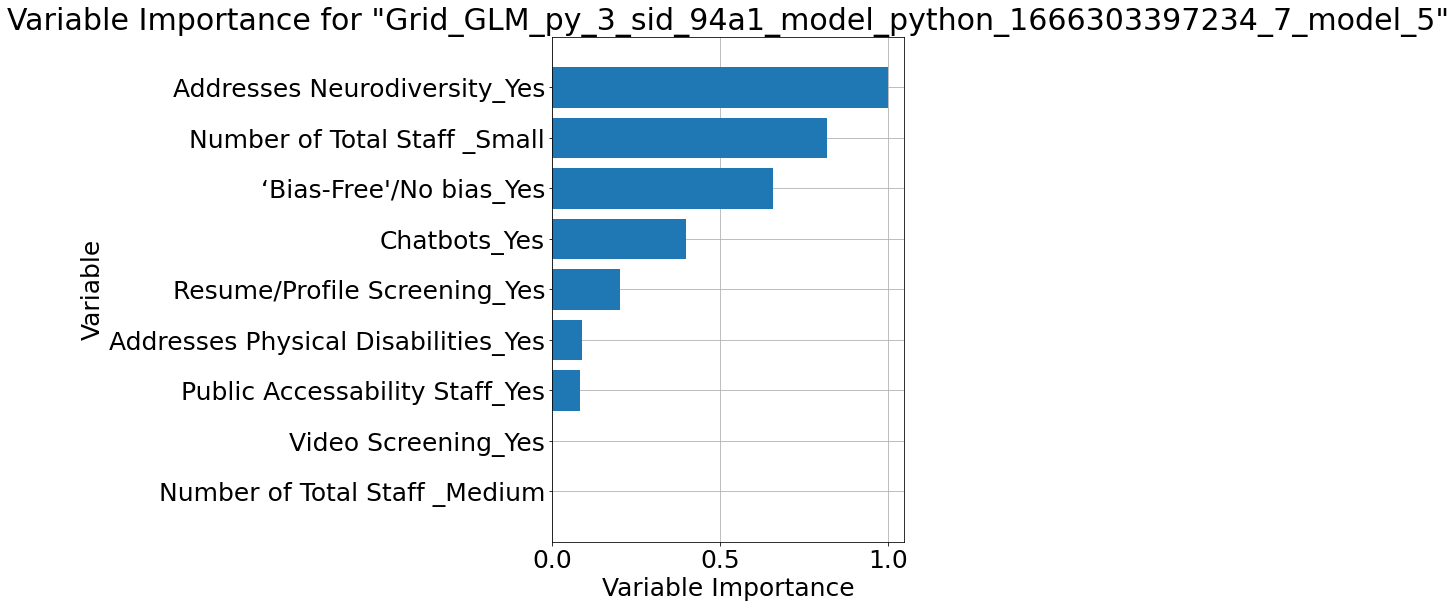

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

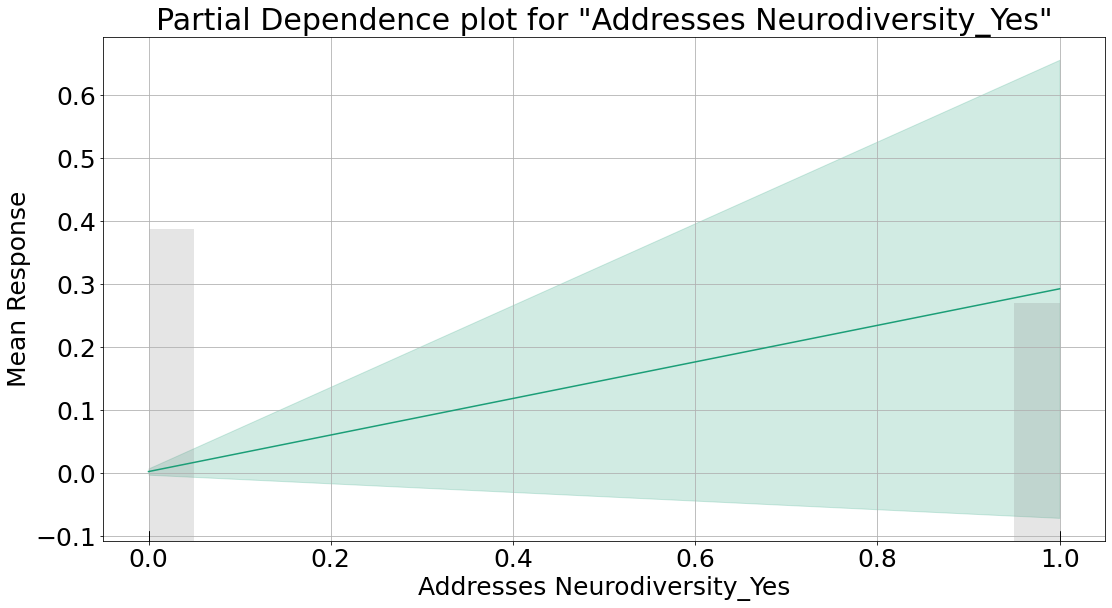

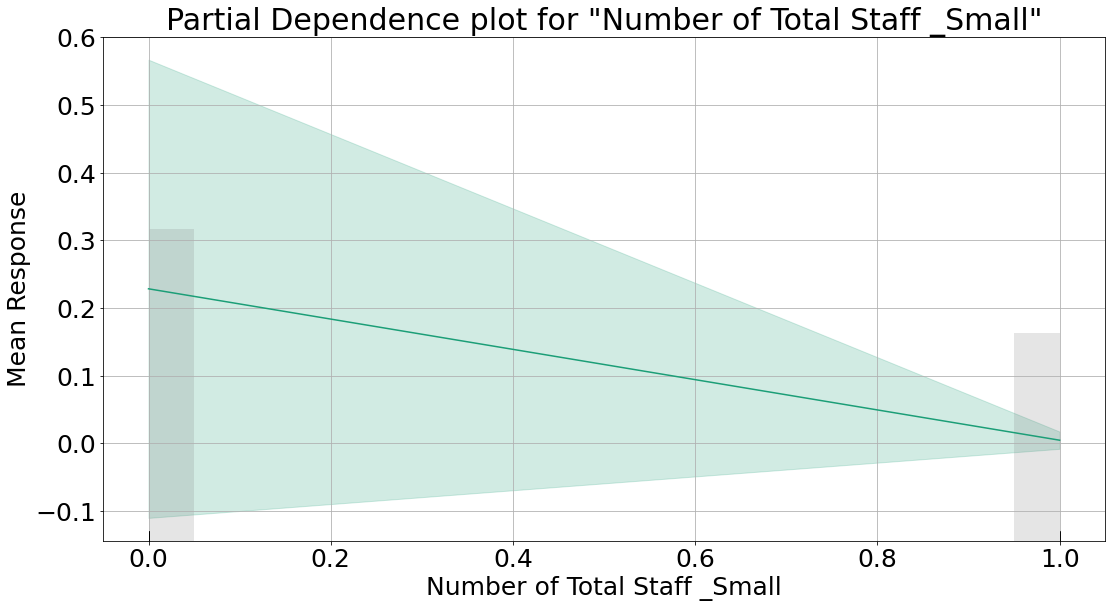

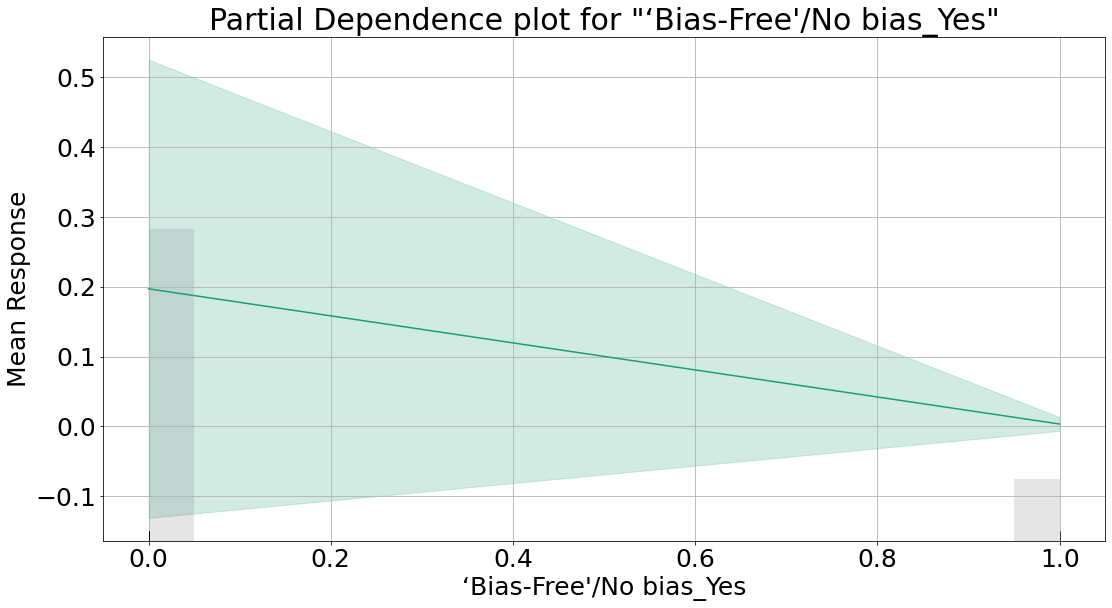

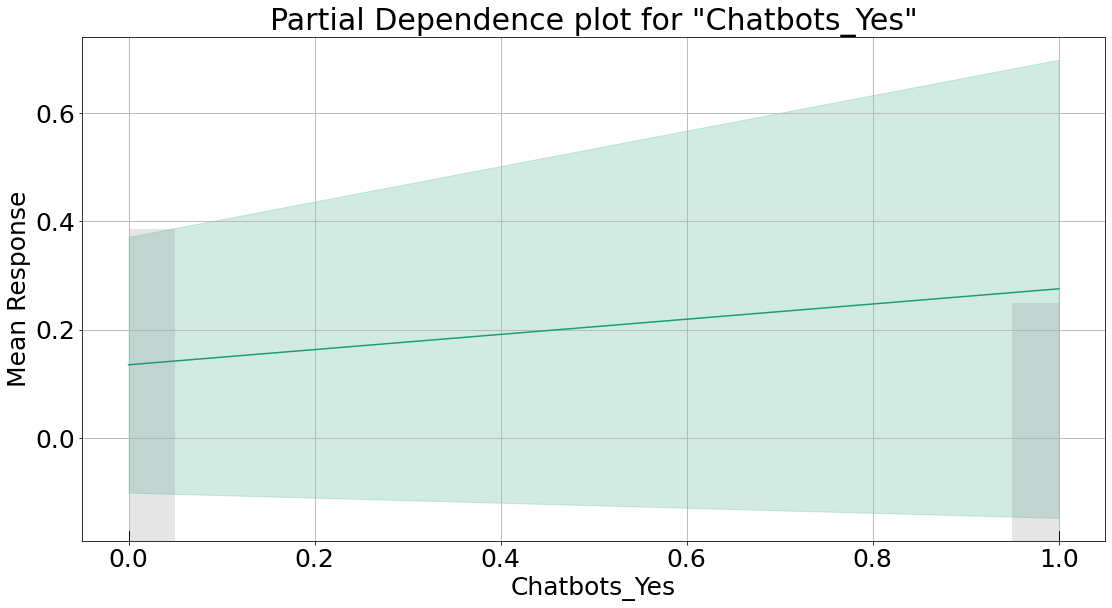

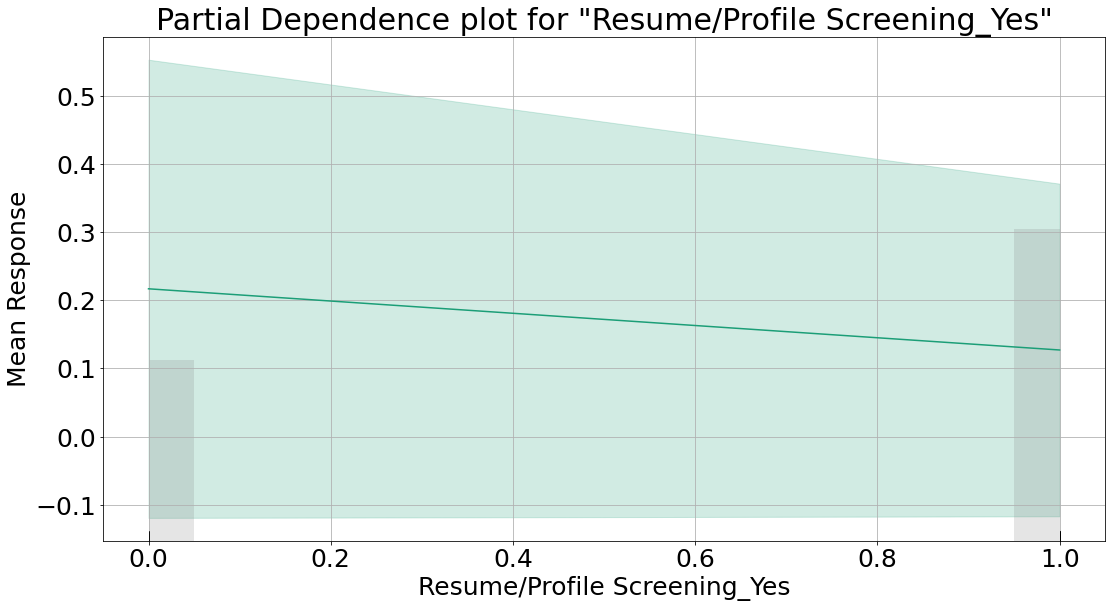

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## Grid_GLM_py_3_sid_94a1_model_python_1666303397234_7_model_5

,0,1,Error,Rate
0,24.0,1.0,0.04,(1.0/25.0)
1,0.0,5.0,0.0,(0.0/5.0)
Total,24.0,6.0,0.0333,(1.0/30.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [36]:
lr.explain(htrain)